In [1]:
#Нейро-нечеткие системы
#Лабораторная работа №5

#Задача: классификация текстов

In [1]:
#мешок слов

%matplotlib inline
import os

from ipywidgets import Select, SelectMultiple, interactive,  Layout, Box, Label

from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing, feature_selection
import sklearn.metrics as metrics

import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
#import seaborn as sns
## for processing
import re
from sklearn.model_selection import train_test_split
import sklearn.feature_selection 
import nltk
#перед использованием раскомментировать
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mkhitaryanvictoria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mkhitaryanvictoria/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.python import keras
from tensorflow.keras import layers,Sequential, Model
from keras.layers import Dense, Input, Activation, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import models

In [4]:
##!pip install gensim==3.4.0
##!pip install smart_open==1.9.0
#import gensim

In [4]:
#оригинальный датасет
df = pd.read_csv("doctor-who.csv", delimiter=",")
# df = df.select_dtypes(include=['number'])
df = df.fillna('hello')
df.head(10)

,idx,text,type,details,episodeid,doctorid
0,0,Sylvest home,location,hello,21-7,6
1,1,Twin boys are playing a cross between chess an...,context,hello,21-7,6
2,2,Where's mother?,talk,REMUS,21-7,6
3,3,She's busy.,talk,SYLVEST,21-7,6
4,4,Does that mean she isn't talking to us?,talk,ROMULUS,21-7,6
5,5,"No, she's just busy.",talk,SYLVEST,21-7,6
6,6,We would like to see her.,talk,BOTH,21-7,6
7,7,She isn't here.,talk,SYLVEST,21-7,6
8,8,She's gone out without saying goodbye?,talk,REMUS,21-7,6
9,9,"Well, yes.",talk,SYLVEST,21-7,6


In [5]:
#выбрать столбец, который будет отвечать за тип
yselect = Select(
        options=list(df.columns),
        value=list(df.columns)[0],
        description='Select file:',
        disabled=False
    )
yselect

Select(description='Select file:', options=('idx', 'text', 'type', 'details', 'episodeid', 'doctorid'), value=…

In [6]:
#выбрать столбец, который будет отвечать за текст
xselect = Select(
        options=list(df.columns),
        value=list(df.columns)[0],
        description='Select file:',
        disabled=False
    )
xselect

Select(description='Select file:', options=('idx', 'text', 'type', 'details', 'episodeid', 'doctorid'), value=…

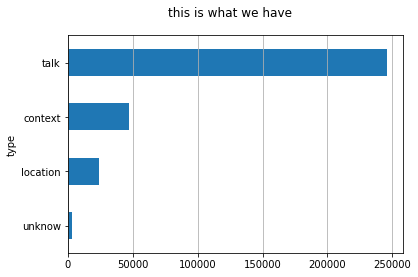

In [7]:
#просто смотрим какие у нас есть лейблы
fig, ax = plt.subplots()
fig.suptitle("this is what we have", fontsize=12)
df[yselect.value].reset_index().groupby(yselect.value).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [8]:
x = df[xselect.value].copy()
y = df[yselect.value].copy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [9]:
from keras.preprocessing import text, sequence
#здесь тот же Bag of Words
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [10]:
tokenize.fit_on_texts(x_train) 
x_train = tokenize.texts_to_matrix(x_train)
x_test = tokenize.texts_to_matrix(x_test)

In [11]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [18]:
y_train

array([2, 1, 1, ..., 2, 2, 0])

In [19]:
from keras import utils
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

AttributeError: module 'keras.utils.generic_utils' has no attribute 'populate_dict_with_module_objects'

In [15]:
batch_size = 32
epochs = 20

model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

NameError: name 'num_classes' is not defined

In [32]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, validation_split=0.1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [33]:
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).